# Visualizations Using Python, Bokeh and Matplotlib

This notebook serves to detail, create and visualize the charts necessary for our ECE 143 final presentation. It will utilize packages such as Matplotlib, Bokeh and Pandas.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import math
from math import pi
import numpy as np
import datetime as DT
import bokeh
from bokeh.plotting import figure, show, output_notebook, output_file, gmap
from bokeh.models import NumeralTickFormatter, ColumnDataSource, GMapOptions, Circle
import re
import ModuleVisualization as mv

## Outline <a id='outline'></a>

[Data Prep](#data)

1. [Radar Plots](#1) 
    1. [Using our defined characteristics](#1a)  
        1. Average Attack
        2. Average Midfield
        3. Average Defender
        4. Average Goalkeeper
    2. [Using Machine Learned characteristics](#1b)
        1. Average Attack
        2. Average Midfield
        3. Average Defender
        4. Average Goalkeeper
    3. [Clusters!](#1c) (TBD)
    4. [Choose random player, find position](#1d)
    
2. [Bar Plots](#2)
    1. [Wage vs Age](#2a)
    
3. [Line Plot](#3)
    1. [Skill & Potential VS Age](#3a)
    2. [Positions: Wage VS Age : W/o major players](#3b)
    
4. [Scatter Plots](#4)
    1. [Wage of the player VS Skill of the player](#4a)
    2. [Value of the player VS Skill of the player](#4b)
    3. [Height VS Skill (Goalkeepers)](#4c)
    4. [Value Vs Age VS Skill](#4e)
    
5. [Heat Map (Similarity Matrix)](#5)

6. [World Map](#6)
    1. [Where is the money?](#6a)
    2. [Where are the players coming from?](#6b)




## Code + Charts

### Data Preparation <a id='data'></a>

In [2]:
#read file
df1 = pd.read_csv('players11.csv') #top 480 players
df2 = pd.read_csv('players12.csv') #~8000 players
df3 = pd.read_csv('players14.csv') #10000 players

#Master Dataframe ==> df
frames = [df1,df2]
df = pd.concat(frames,ignore_index=True)

#Mega Dataframe ==> mdf
frames = [df1,df2,df3]
mdf = pd.concat(frames,ignore_index=True)

print 'Data Acquired'

Data Acquired


[Go Back To Outline](#outline)

### 1. Radar Plot  <a id='1'></a>

#### A. Using Our Defined Characteristics <a id='1a'></a>

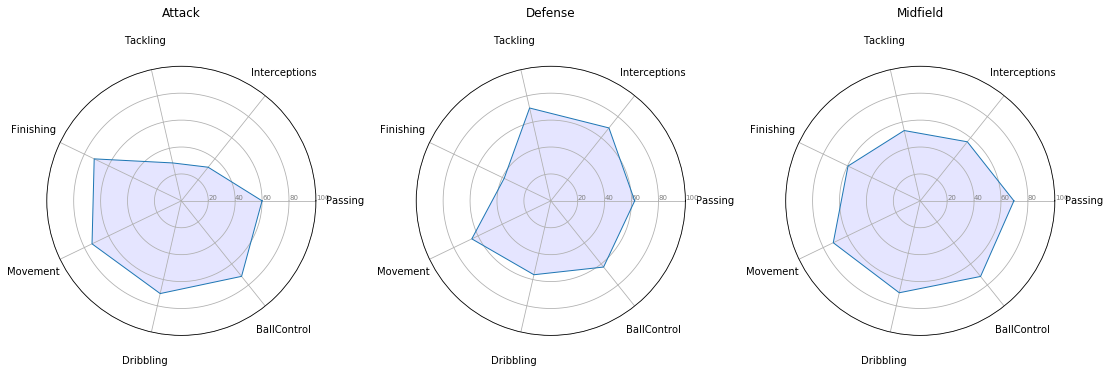

In [3]:
Attributes = ['Passing','Interceptions','Tackling','Finishing','Movement','Dribbling','BallControl','club_pos']

mapping = {'RM':'Midfield',
'GK': 'Goalkeeper',
'CB': 'Defense',
'LCB':'Defense',
'RCB': 'Defense',
'LB':'Defense',
'RB': 'Defense',
'RWB': 'Defense',
'LWB': 'Defense',
'CM' : 'Midfield',
'LDM': 'Midfield',
'LAM': 'Midfield',
'RDM': 'Midfield',
'RAM': 'Midfield',
'RCM' : 'Midfield',
'LCM' : 'Midfield',
'CDM': 'Midfield',
'CAM': 'Midfield',
'LM' : 'Midfield',
'RM' : 'Midfield',
'ST': 'Attack',
'CF': 'Attack',
'LW': 'Attack',
'RW': 'Attack',
'RS': 'Attack',
'LS' : 'Attack'}

outfile = 'radar_plot_user.png'
mv.radar_plot(df,Attributes,mapping,outfile)

[Go Back To Outline](#outline)

#### B. Using Machined-Learned Characteristics <a id='1b'></a>

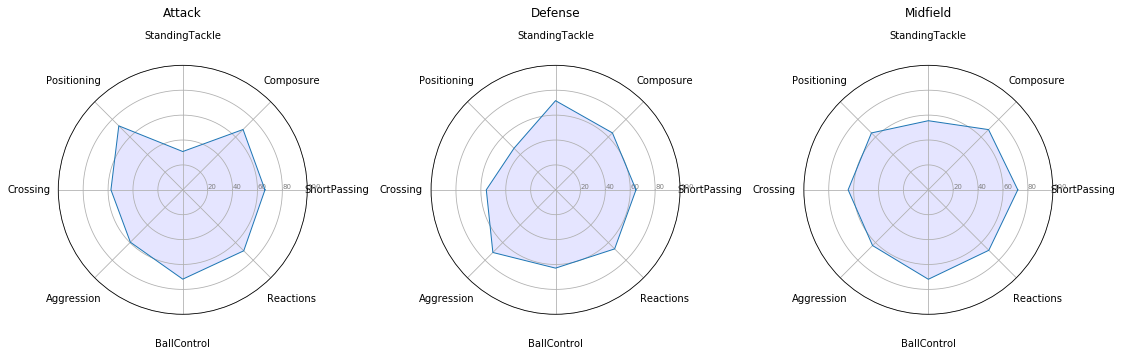

In [4]:
Attributes = ['ShortPassing','Composure','StandingTackle','Positioning','Crossing','Aggression','BallControl','Reactions','club_pos']

outfile = 'radar_plot_ml.png'
mv.radar_plot(df,Attributes,mapping,outfile,False)

[Go Back To Outline](#outline)

#### C. Clusters <a id='1c'></a>

In [5]:
#TBD

[Go Back To Outline](#outline)

#### D. Choose Random Player, Find Position <a id='1d'></a>

In [6]:
#TBD

[Go Back To Outline](#outline)

### 2. Bar Plots <a id='2'></a>

#### A. Wage VS Age <a id='2a'></a>

In [7]:
"""
bar plots showing average paid per age

"""
from bokeh.plotting import figure, show, output_notebook
import numpy as np
df_2a = df
df_2a.drop(df_2a[df_2a.club_pos == 'GK'].index, inplace=True)
x = 'height'
y = 'Agility'
p = mv.bar_plot(df_2a,x,y)
show(p)

Loading BokehJS ...

[Go Back To Outline](#outline)

### 3. Line Plots <a id='3'></a>

#### A. Skill & Potential VS Age <a id='3a'></a>

In [8]:
# library
import bokeh
from bokeh.plotting import figure, output_notebook, show
import numpy as np
import matplotlib.pyplot as plt

"""
line chart showing 
Skill & Potential VS Age

"""
#select y and x
y1 = 'rating'
y2 = 'potential'
x = 'age'

df_3a = df

p = mv.line_plot(df_3a,x,y1,y2)
show(p)

Loading BokehJS ...

[Go Back To Outline](#outline)

#### B & C. Positions: Wage VS Age : With & without major players <a id='3b'></a>

In [9]:
# library
import bokeh
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_notebook, show

y = 'wage'
x = 'age'

df_3b = df1

p = mv.line_plot_pos(df_3b,x,y,mapping,False)
show(p)

Loading BokehJS ...

[Go Back To Outline](#outline)

### 4. Scatter Plots <a id='4'></a>

#### A. Wage VS Skill <a id='4a'></a>

In [10]:
import bokeh
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import NumeralTickFormatter

"""
scatter plot showing skill/rating vs wage
showing all players and mean

"""
df_4a = df1
x = 'rating'
y = 'wage'
p = mv.scatter_plot(df_4a,x,y)
p.yaxis[0].formatter = NumeralTickFormatter(format="000,000")
p.xaxis.axis_label = 'Overall Skill Rating'
p.yaxis.axis_label = 'Wage (Euros)'
show(p)

Loading BokehJS ...

[Go Back To Outline](#outline)

#### B. Value VS Skill <a id='4b'></a>

In [11]:
import bokeh
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import NumeralTickFormatter

"""
scatter plot showing skill/rating vs value
showing all players and mean

"""
df_4b = df1
x = 'rating'
y = 'value'
p = mv.scatter_plot(df_4b,x,y)
p.yaxis[0].formatter = NumeralTickFormatter(format="000,000")
p.xaxis.axis_label = 'Overall Skill Rating'
p.yaxis.axis_label = 'Value (Millions of Euros)'
show(p)

Loading BokehJS ...

[Go Back To Outline](#outline)

#### C. Height VS Skill (Goalkeeper)  <a id='4c'></a>

In [12]:
import bokeh
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import NumeralTickFormatter

"""
scatter plot showing height vs rating
showing only goalkeepers

"""

df_4c = df
x = 'rating'
y = 'height'
p = mv.scatter_plot(df_4c,x,y,'GK')
p.xaxis.axis_label = 'Overall Skill Rating'
p.yaxis.axis_label = 'Height (cm)'
show(p)

Loading BokehJS ...

[Go Back To Outline](#outline)

#### D. Value VS Age VS Skill <a id='4e'></a>

In [13]:
import bokeh
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import Circle, NumeralTickFormatter

"""
bubble and scatter
"""
df_4d = df1
x = 'rating'
y = 'value'
z = 'age'
p = mv.bubble_scatter_plot(df_4d,x,y,z)
show(p)

Loading BokehJS ...

[Go Back To Outline](#outline)

### 5. Heat Map  <a id='5'></a>

Check out SimilarityMatrix.ipynb!

[Go Back To Outline](#outline)

### 6. World Map <a id='6'></a>

#### A. Where Is The Money? <a id='6a'></a>

In [14]:
df_6a = mdf
norm = 0.0001
outfile = 'wheremoney.html'
p = mv.world_map_plot(df_6a,norm,outfile,True,'red')
show(p)

[Go Back To Outline](#outline)

#### B. Where Do Good Players Come From? <a id='6b'></a>

In [16]:
df_6b = df1
norm = 0.2
outfile = 'wheregood.html'
p = mv.world_map_plot(df_6b,norm,outfile,False,'red')
show(p)

[Go Back To Outline](#outline)